In [81]:
import csv
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pylab as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns

In [3]:
movies_df = pd.read_csv('./MoviesOnStreamingPlatforms.csv')
movies_df.head(10)
movies_df=movies_df.iloc[:, 1:].set_index('ID')
movies_df.head(5)



,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0
2,Dangal,2016,7+,97/100,1,0,0,0,0
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
5,Roma,2018,18+,94/100,1,0,0,0,0


In [4]:
movies_df.value_counts()

Title                Year  Age  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type
#FriendButMarried 2  2020  16+  47/100           1        0     0            0        0       1
Shadow Company       2006  13+  44/100           0        0     1            0        0       1
Shaandaar            2015  13+  45/100           1        0     0            0        0       1
Sextuplets           2019  16+  55/100           1        0     0            0        0       1
Sex Drive            2008  18+  70/100           1        0     0            0        0       1
                                                                                             ..
Happy Hour           2003  16+  43/100           0        0     1            0        0       1
Happy Birthday       2016  18+  50/100           0        0     1            0        0       1
Happy Anniversary    2018  18+  55/100           1        0     0            0        0       1
Happiest Season      2020  13+  83/100       

In [5]:
# Iterate through each row
#   if Netflix == 1 then platform = 'Netflix'






movies_df['platform']=''
for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']: 
    movies_df.loc[movies_df[each_platform]==1, 'platform']=each_platform

In [6]:
#Adding new column to the mpvies dataframe






movies_df['platform']=movies_df['platform']

In [7]:
                                  # Checking and filling all the Nan values with zeros
    
    
    
    
    
    
movies_df.isnull().sum().sum()                     # This gives the sum of all of the values missing in the total dataframe
movies_df.isnull().sum()                           # A breakdown of how many values are missing in the dataframe and where
movies_df['Rotten Tomatoes'].isnull().values.any() # Checking for missing values in the series
movies_df['Rotten Tomatoes'].isnull().sum()        # Returns the missing value count in the series
movies_df['Rotten Tomatoes'].unique()              # Cheking the unique values
movies_df[movies_df['Rotten Tomatoes'].isna()]     # Checking the row with absent sets
movies_df['Rotten Tomatoes'] = movies_df['Rotten Tomatoes'].fillna(0) # Filling all the Nan values with zeros
 

In [8]:
                                   # Converting the string into a float and storing in an array for use

    
    
    
new_array=[]
for rate in movies_df['Rotten Tomatoes']:
    new_rate = str(rate).replace('/', '')
    new_rate_2=float(new_rate[0:2])
    new_array.append(new_rate_2)

   
     
  



 


In [9]:
                                 # Using the new_array as the new column in the Dataframe 

    
    
    
movies_df['Rotten Tomatoes']=new_array
movies_df.head(5)

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,platform
ID,,,,,,,,,,
1,The Irishman,2019,18+,98.0,1,0,0,0,0,Netflix
2,Dangal,2016,7+,97.0,1,0,0,0,0,Netflix
3,David Attenborough: A Life on Our Planet,2020,7+,95.0,1,0,0,0,0,Netflix
4,Lagaan: Once Upon a Time in India,2001,7+,94.0,1,0,0,0,0,Netflix
5,Roma,2018,18+,94.0,1,0,0,0,0,Netflix


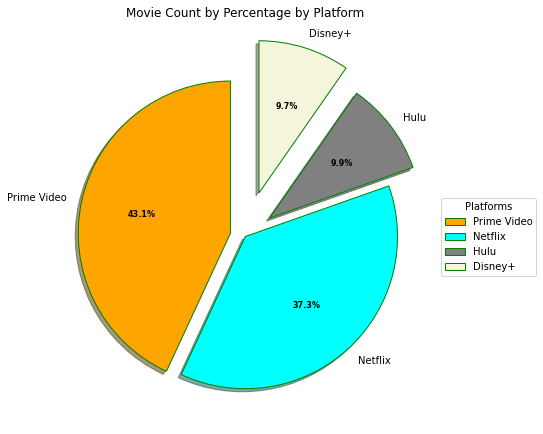

In [67]:
                        # Part 2 Checking to see which value has the greatest movie count and the best ratings

    
    
# 1. Which streaming platform offers the highest number of movies

movies_df['platform'].value_counts().to_dict()






# 2. A pie chart based on the percentage of movies per platform from this dataset
 
# Creating dataset
cars = ['Prime Video', 'Netflix', 'Hulu',
        'Disney+']
 
data = [4100,3550,943,922]
 
 
# Creating explode
explode = (0.1, 0.0, 0.2, 0.3)
 
# Creating color parameters
colors = ( "orange", "cyan", 
          "grey", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Name,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, Name,
          title ="Platforms",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Movie Count by Percentage by Platform",pad=30)
 
# show plot
plt.show()

<BarContainer object of 5 artists>

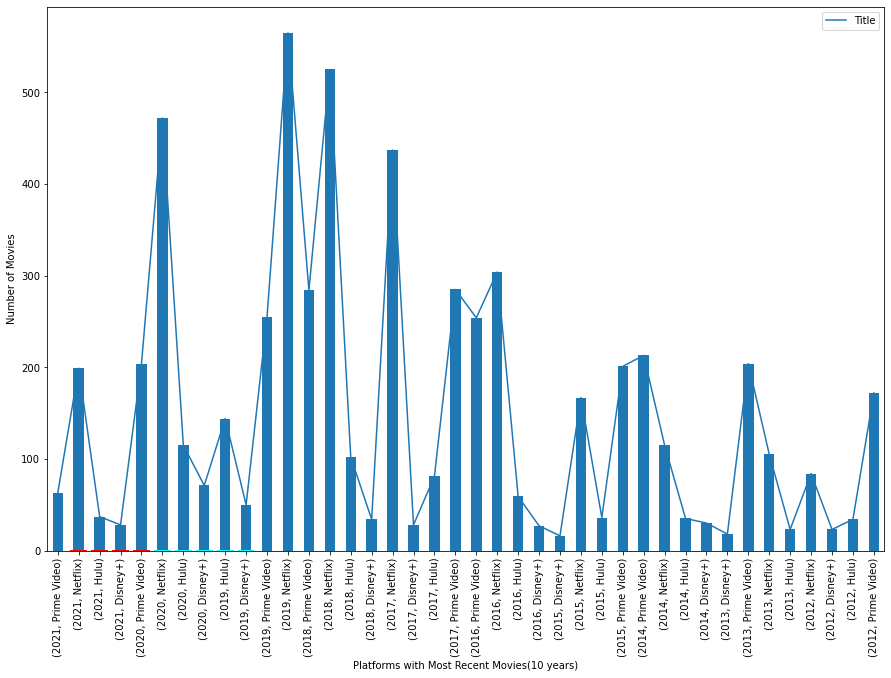

In [154]:
# Which streaming platform offers the newest movies(last 10 years)


# The titles per Platform tells the amount

#movies_df['Year'].value_counts().head(10)   * You can check yearly values with this


year_platform=movies_df[['Year','platform','Title']].groupby(['Year', 'platform']).count().sort_values(by='Year',ascending=False).head(40)
year_platform

#Plot
year_platform.plot(figsize=(15,10))
year_platform['Title'].plot.bar()
plt.xlabel("Platforms with Most Recent Movies(10 years)")
plt.ylabel("Number of Movies")

#color coding

#x = np.arange(10)
#y = np.arange(10) * 0.1
#mask1 = y < 0.5
#mask2 = y >= 0.5
#plt.bar(x[mask1], y[mask1], color = 'red')
#plt.bar(x[mask2], y[mask2], color = 'cyan')
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#data = np.arange(5)
#width = 0.5
#vals = [1, 2, 1, 5, 3]
#colors = ["red" if i != 2 else "yellow" for i in vals]
#plt.bar(data, vals, width, color=colors)
#plt.show()

Text(0, 0.5, 'Number of Top Rated Movies')

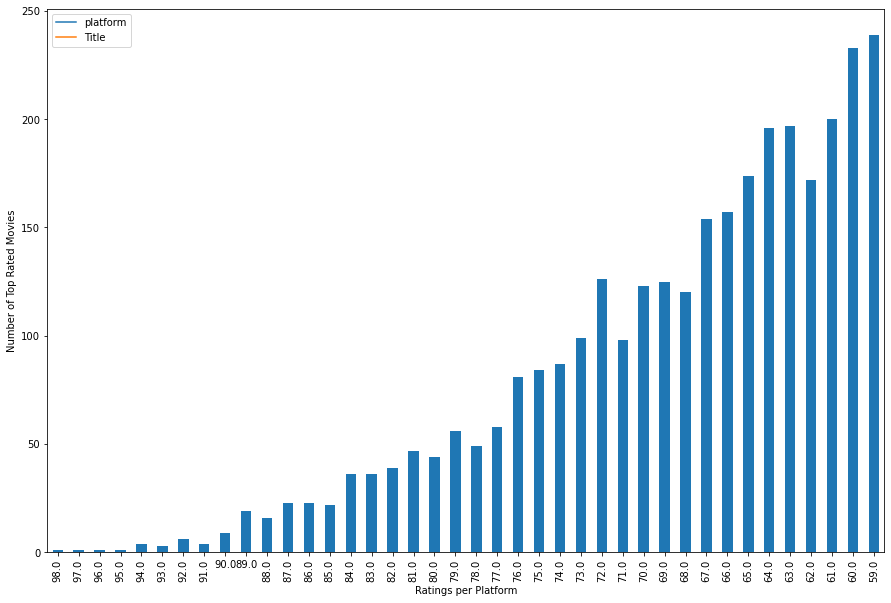

In [169]:

# Platform with the movies with the highest ratings

# !!!!note I am using tail and the ascending is False!!!

ratings=movies_df[['Rotten Tomatoes','platform','Title']].groupby(['Rotten Tomatoes']).count().tail(50).sort_values(by='Rotten Tomatoes',ascending=False).head(40)
ratings



ratings.plot(figsize=(15,10))
ratings['Title'].plot.bar()
plt.xlabel("Ratings per Platform")
plt.ylabel("Number of Top Rated Movies")





In [164]:
x=movies_df.groupby(['Rotten Tomatoes', 'platform','Year']).count()
x

Title  Age  Netflix  Hulu  Prime Video  \
Rotten Tomatoes platform Year                                           
0.0             Netflix  1996      1    0        1     1            1   
                         2017      1    0        1     1            1   
                         2018      1    0        1     1            1   
                         2019      2    0        2     2            2   
                         2020      2    0        2     2            2   
...                              ...  ...      ...   ...          ...   
94.0            Netflix  2018      2    2        2     2            2   
95.0            Netflix  2020      1    1        1     1            1   
96.0            Disney+  1964      1    1        1     1            1   
97.0            Netflix  2016      1    1        1     1            1   
98.0            Netflix  2019      1    1        1     1            1   

                               Disney+  Type  
Rotten Tomatoes platform Year                 
0.0             Netflix  1996        1     1  
                         2017        1     1  
                         2018        1     1  
                         2019        2     2  
                         2020        2     2  
...                                ...   ...  
94.0            Netflix  2018        2     2  
95.0            Netflix  2020        1     1  
96.0            Disney+  1964        1     1  
97.0            Netflix  2016        1     1  
98.0            Netflix  2019        1     1  

[3986 rows x 7 columns]

<AxesSubplot:xlabel='Rotten Tomatoes,platform,Year'>

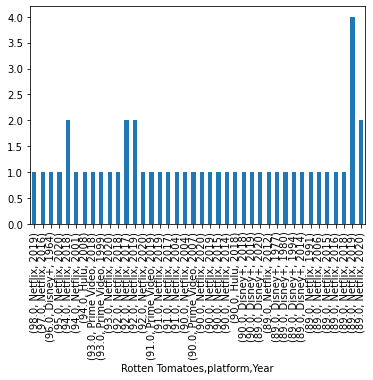

In [168]:
ratings=movies_df[['Rotten Tomatoes','platform','Title','Year']].groupby(['Rotten Tomatoes','platform','Year']).count().tail(50).sort_values(by='Rotten Tomatoes',ascending=False).head(40)
#ratings
ratings['Title'].plot.bar()
ratings=movies_df

In [ ]:

ax = sns.barplot(x="Total", y="total_bill", hue="sex", data=tips)

In [ ]:
ratings=movies_df.groupby([])